<a href="https://colab.research.google.com/github/alirezalorestani23/DM-Clustering/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
get_ipython().system_raw("unrar x /content/drive/MyDrive/datasets/divar_dataset.rar")
get_ipython().system_raw("unrar x /content/drive/MyDrive/digikala_dataset.rar")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [ ]:
divar_dataset = pd.read_csv("divar_posts_dataset.csv")
digikala_dataset = pd.read_csv("orders.csv")

In [ ]:
divar_dataset.head()

,Unnamed: 0,archive_by_user,brand,cat1,cat2,cat3,city,created_at,desc,id,image_count,mileage,platform,price,title,type,year
0,0,False,NaN,for-the-home,furniture-and-home-decore,sofa-armchair,Tehran,Tuesday 07PM,کلاسیک و شیک و استثنایی\nچرم مالزی\nچوب راش\nف...,54761638662241,5,NaN,mobile,3850000,ست مبلمان و نهارخوری ٩ نفره,NaN,NaN
1,1,False,NaN,for-the-home,furniture-and-home-decore,antiques-and-art,Mashhad,Tuesday 07PM,"سلام,یک عدد گلدون نخل سه طبقه ی سالم دارم با پ...",42727631379133,1,NaN,mobile,30000,گلدون مصنوعی نخل,NaN,NaN
2,2,False,NaN,vehicles,cars,heavy,Mashhad,Tuesday 07PM,سریال 43j$NUMبدون شکستگی سه حلقه لاستیک نو یک ...,63194439667302,4,NaN,mobile,-1,لودر کاتر پیلار 950,NaN,NaN
3,3,False,NaN,for-the-home,furniture-and-home-decore,sofa-armchair,Tehran,Tuesday 07PM,مبل راحتی هفت نفره شامل سه نفره یک عدد دونفره ...,19133025491169,4,NaN,mobile,600000,مبل راحتی هفت نفره بامیز جلو مبلی,NaN,NaN
4,4,False,NaN,personal,baby-and-toys,personal-toys,Karaj,Tuesday 08PM,شارژی کنترلی سویچ حمل تا 35 کیلو صندلی برای دو...,58998998335444,2,NaN,mobile,450000,ماشین شارژی,NaN,NaN


In [ ]:
digikala_dataset.head()

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0


get city list:

In [ ]:
unique_cities = divar_dataset.city.unique()
print(unique_cities)


['Tehran' 'Mashhad' 'Karaj' 'Qom' 'Isfahan' 'Shiraz' 'Tabriz' 'Ahvaz'
 'Kermanshah']


get product list:

In [ ]:
divar_dataset['categories'] = divar_dataset['cat1']+" "+divar_dataset['cat2']
divar_dataset.head()

,Unnamed: 0,archive_by_user,brand,cat1,cat2,cat3,city,created_at,desc,id,image_count,mileage,platform,price,title,type,year,categories
0,0,False,NaN,for-the-home,furniture-and-home-decore,sofa-armchair,Tehran,Tuesday 07PM,کلاسیک و شیک و استثنایی\nچرم مالزی\nچوب راش\nف...,54761638662241,5,NaN,mobile,3850000,ست مبلمان و نهارخوری ٩ نفره,NaN,NaN,for-the-home furniture-and-home-decore
1,1,False,NaN,for-the-home,furniture-and-home-decore,antiques-and-art,Mashhad,Tuesday 07PM,"سلام,یک عدد گلدون نخل سه طبقه ی سالم دارم با پ...",42727631379133,1,NaN,mobile,30000,گلدون مصنوعی نخل,NaN,NaN,for-the-home furniture-and-home-decore
2,2,False,NaN,vehicles,cars,heavy,Mashhad,Tuesday 07PM,سریال 43j$NUMبدون شکستگی سه حلقه لاستیک نو یک ...,63194439667302,4,NaN,mobile,-1,لودر کاتر پیلار 950,NaN,NaN,vehicles cars
3,3,False,NaN,for-the-home,furniture-and-home-decore,sofa-armchair,Tehran,Tuesday 07PM,مبل راحتی هفت نفره شامل سه نفره یک عدد دونفره ...,19133025491169,4,NaN,mobile,600000,مبل راحتی هفت نفره بامیز جلو مبلی,NaN,NaN,for-the-home furniture-and-home-decore
4,4,False,NaN,personal,baby-and-toys,personal-toys,Karaj,Tuesday 08PM,شارژی کنترلی سویچ حمل تا 35 کیلو صندلی برای دو...,58998998335444,2,NaN,mobile,450000,ماشین شارژی,NaN,NaN,personal baby-and-toys


In [ ]:
categories = divar_dataset.categories.unique()
print(categories)

['for-the-home furniture-and-home-decore' 'vehicles cars'
 'personal baby-and-toys' 'vehicles parts-accessories'
 'for-the-home utensils-and-appliances' 'personal clothing-and-shoes'
 'electronic-devices mobile-tablet' 'personal childrens-clothing-and-shoe'
 'electronic-devices game-consoles-and-video-games'
 'electronic-devices audio-video' 'for-the-home building-and-garden'
 'personal jewelry-and-watches' 'businesses equipments-and-machinery'
 'leisure-hobbies bicycle' 'leisure-hobbies animals' nan
 'businesses batch' 'leisure-hobbies musical-instruments'
 'personal health-beauty' 'vehicles motorcycles'
 'electronic-devices computers' 'leisure-hobbies sport-leisure'
 'leisure-hobbies book-student-literature' 'for-the-home utility'
 'leisure-hobbies travel-packages' 'leisure-hobbies hobby-collectibles'
 'leisure-hobbies leisure-hobbies-toys' 'electronic-devices phone']


make vector from cities:

In [ ]:
cities_vector =  pd.DataFrame(0, index=unique_cities, columns=categories)
print(cities_vector)

            for-the-home furniture-and-home-decore  ...  electronic-devices phone
Tehran                                           0  ...                         0
Mashhad                                          0  ...                         0
Karaj                                            0  ...                         0
Qom                                              0  ...                         0
Isfahan                                          0  ...                         0
Shiraz                                           0  ...                         0
Tabriz                                           0  ...                         0
Ahvaz                                            0  ...                         0
Kermanshah                                       0  ...                         0

[9 rows x 28 columns]


In [ ]:
for i in range(len(divar_dataset)):
  current_city = divar_dataset.iloc[i]['city']
  current_cat = divar_dataset.iloc[i]['categories']
  cities_vector.at[current_city,current_cat] = cities_vector.at[current_city,current_cat]+1
print(cities_vector)

            for-the-home furniture-and-home-decore  ...  electronic-devices phone
Tehran                                      103579  ...                      1193
Mashhad                                      27146  ...                         0
Karaj                                        20359  ...                         0
Qom                                           6347  ...                         0
Isfahan                                      11097  ...                         0
Shiraz                                       12298  ...                         0
Tabriz                                        6789  ...                         0
Ahvaz                                        11507  ...                         0
Kermanshah                                    5323  ...                         0

[9 rows x 28 columns]


kmeans:

choose optimal k for k-means:

In [ ]:
distortions = []
mapping = {} 
K = range(1,10)
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(cities_vector)
 
    distortions.append(sum(np.min(cdist(cities_vector, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / cities_vector.shape[0])

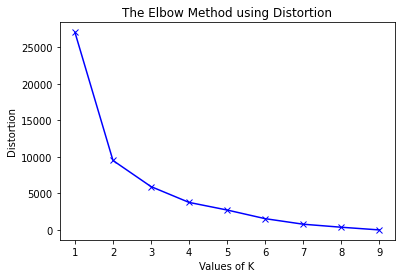

In [ ]:

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

To determine the optimal number of clusters, we have to select the value of k at the elbow ie the point after which the distortion start decreasing in a linear fashion. 
so we choose **k=4**

In [ ]:
kmean = KMeans(n_clusters=4)
kmean.fit(cities_vector)
clustered_cities = kmean.predict(cities_vector)
clustered_cities_df = pd.DataFrame(clustered_cities,index=unique_cities, columns=['cluster'])
print(clustered_cities_df)


            cluster
Tehran            1
Mashhad           3
Karaj             2
Qom               0
Isfahan           2
Shiraz            2
Tabriz            0
Ahvaz             0
Kermanshah        0


**TASK 2**

sampling half of data:

In [ ]:
print(len(digikala_dataset))
digikala_dataset = digikala_dataset.sample(frac=0.5, replace=True, random_state=1)
print(len(digikala_dataset))


200000
100000


drop not mutual cities:

In [ ]:
divar_cities_fa = ['تهران', 'مشهد', 'کرج', 'قم', 'اصفهان', 'شیراز', 'تبریز', 'اهواز','کرمانشاه']
digikala_dataset = digikala_dataset.loc[digikala_dataset['city_name_fa'].isin(divar_cities_fa)]
print(len(digikala_dataset))

70988


get list of item ids:

In [ ]:
items = digikala_dataset.ID_Item.unique()
print(items)

[155682  42917 128911 ...   3860 154617 345800]


In [ ]:
digi_cities_vector =  pd.DataFrame(0, index=divar_cities_fa, columns=items)
print(digi_cities_vector)

          155682  42917   128911  ...  3860    154617  345800
تهران          0       0       0  ...       0       0       0
مشهد           0       0       0  ...       0       0       0
کرج            0       0       0  ...       0       0       0
قم             0       0       0  ...       0       0       0
اصفهان         0       0       0  ...       0       0       0
شیراز          0       0       0  ...       0       0       0
تبریز          0       0       0  ...       0       0       0
اهواز          0       0       0  ...       0       0       0
کرمانشاه       0       0       0  ...       0       0       0

[9 rows x 36553 columns]


In [ ]:
for j in range(len(digikala_dataset)):
  digi_current_city = digikala_dataset.iloc[j]['city_name_fa']
  current_item = digikala_dataset.iloc[j]['ID_Item']
  digi_cities_vector.at[digi_current_city,current_item] = digi_cities_vector.at[digi_current_city,current_item]+1
print(digi_cities_vector)

          155682  42917   128911  ...  3860    154617  345800
تهران          1       2       1  ...       1       1       1
مشهد           0       0       0  ...       0       0       0
کرج            0       0       0  ...       0       0       0
قم             0       0       0  ...       0       0       0
اصفهان         1       0       0  ...       0       0       0
شیراز          0       0       0  ...       0       0       0
تبریز          0       0       0  ...       0       0       0
اهواز          0       0       0  ...       0       0       0
کرمانشاه       0       0       0  ...       0       0       0

[9 rows x 36553 columns]


In [ ]:
kmean = KMeans(n_clusters=4)
kmean.fit(digi_cities_vector)
clustered_digi_cities = kmean.predict(digi_cities_vector)
clustered_digi_cities_df = pd.DataFrame(clustered_digi_cities,index=divar_cities_fa, columns=['cluster'])
print(clustered_digi_cities_df)

          cluster
تهران           1
مشهد            3
کرج             0
قم              0
اصفهان          2
شیراز           0
تبریز           0
اهواز           0
کرمانشاه        0


**TASK 3**

In [ ]:
print(clustered_digi_cities_df)
print(clustered_cities_df)

          cluster
تهران           1
مشهد            3
کرج             0
قم              0
اصفهان          2
شیراز           0
تبریز           0
اهواز           0
کرمانشاه        0
            cluster
Tehran            1
Mashhad           3
Karaj             2
Qom               0
Isfahan           2
Shiraz            2
Tabriz            0
Ahvaz             0
Kermanshah        0


با مقایسه نتایج به دست آمده میبینیم که نتیجه خوشه بندی دو دیتا بیس روی شهر های مشترک تا حد زیادی مشابه است.
 به جز دو مورد اختلاف در شهرهای کرج و شیراز که در دو خوشه بندی مختلف در دسته های متفاوتی قرار گرفتند بقیه در گروه های مشابهی قرار گرفته اند. که باز هم نکته ی جالب توجه این است که هر دو همزمان در خوشه بندی دوم در دسته ی دیگری قرار گرفته اند.




**TASK 4**

get list of prices:

In [ ]:
prices = divar_dataset.price.unique()
print(prices)

[ 3850000    30000       -1 ...  1185000 12850009 25000005]


In [ ]:
product_vectors = pd.DataFrame(0, index=categories, columns=prices)
print(product_vectors)

                                                  3850000   ...  25000005
for-the-home furniture-and-home-decore                   0  ...         0
vehicles cars                                            0  ...         0
personal baby-and-toys                                   0  ...         0
vehicles parts-accessories                               0  ...         0
for-the-home utensils-and-appliances                     0  ...         0
personal clothing-and-shoes                              0  ...         0
electronic-devices mobile-tablet                         0  ...         0
personal childrens-clothing-and-shoe                     0  ...         0
electronic-devices game-consoles-and-video-games         0  ...         0
electronic-devices audio-video                           0  ...         0
for-the-home building-and-garden                         0  ...         0
personal jewelry-and-watches                             0  ...         0
businesses equipments-and-machinery   

In [ ]:
for z in range(len(divar_dataset)):
  current_price = divar_dataset.iloc[z]['price']
  current_category = divar_dataset.iloc[z]['categories']
  product_vectors.at[current_category,current_price] = product_vectors.at[current_category,current_price]+1
print(product_vectors)

                                                  3850000   ...  25000005
for-the-home furniture-and-home-decore                  11  ...         0
vehicles cars                                            3  ...         1
personal baby-and-toys                                   0  ...         0
vehicles parts-accessories                               0  ...         0
for-the-home utensils-and-appliances                     2  ...         0
personal clothing-and-shoes                              0  ...         0
electronic-devices mobile-tablet                         0  ...         0
personal childrens-clothing-and-shoe                     0  ...         0
electronic-devices game-consoles-and-video-games         0  ...         0
electronic-devices audio-video                           0  ...         0
for-the-home building-and-garden                         0  ...         0
personal jewelry-and-watches                             1  ...         0
businesses equipments-and-machinery   

In [ ]:
cat_distortions = []
 
K = range(1,29)
for k in K:
    # Building and fitting the model
    kmean = KMeans(n_clusters=k).fit(product_vectors)
 
    cat_distortions.append(sum(np.min(cdist(product_vectors, kmean.cluster_centers_,
                                        'euclidean'), axis=1)) / product_vectors.shape[0])

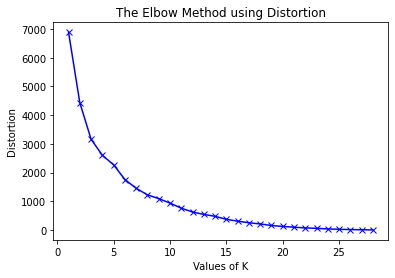

In [ ]:
plt.plot(K, cat_distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [ ]:
kmean = KMeans(n_clusters=11)
kmean.fit(product_vectors)
clustered_products = kmean.predict(product_vectors)
clustered_products_df = pd.DataFrame(clustered_products,index=categories, columns=['cluster'])
print(clustered_products_df)

                                                  cluster
for-the-home furniture-and-home-decore                  1
vehicles cars                                           4
personal baby-and-toys                                  0
vehicles parts-accessories                              2
for-the-home utensils-and-appliances                    9
personal clothing-and-shoes                             3
electronic-devices mobile-tablet                        5
personal childrens-clothing-and-shoe                    0
electronic-devices game-consoles-and-video-games        7
electronic-devices audio-video                          7
for-the-home building-and-garden                        7
personal jewelry-and-watches                            0
businesses equipments-and-machinery                     6
leisure-hobbies bicycle                                 0
leisure-hobbies animals                                 2
NaN                                                     8
businesses bat